In [76]:
import sys
for k in ['ham_basic', 'Sequencer', 'sequencer']:
    if k in sys.modules: del sys.modules[k]
import pandas as pd
import numpy as np
import time

from ham_basic import program
program.initialize(B=200, R=0.5, delta=1)
program.read_data(pd.read_csv('close.csv'))

In [78]:
from sequencer import Sequencer
from scipy.optimize import minimize

seq = Sequencer()
seq.set_name('EfficientSU2, scipy-min on statevector')
seq.set_program(program)
seq.set_backend('statevector')
seq.set_ansatz('qiskit-EfficientSU2')

x0 = 2 * np.pi * np.random.random(program.size*8)
start_time = time.time()
cobyla = minimize(seq.cost_func, x0, method='COBYLA', options={'disp': True}) #'maxiter':400
end_time = time.time()

print("time for operation", end_time-start_time)
opt_params = cobyla.x
opt_energy = cobyla.fun

time for operation
   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS = 1000   F = 1.265129E+00    MAXCV = 0.000000E+00
   X = 3.160685E+00   1.433979E+00   3.114201E+00   4.377274E+00   3.887012E+00
       5.789071E+00   4.466975E+00   4.380488E+00   5.730727E+00   1.041832E-02
       1.479232E+00   5.389878E+00   1.341530E+00   4.716629E+00   5.839910E+00
       2.778126E+00   1.127751E+00   5.148531E+00   2.701977E+00   3.053430E+00
       5.379565E+00   2.320678E+00   8.482113E-01   2.591651E-01
 9.259129047393799


optimal vector: [0. 0. 0. 1.]
money invested: 181.27999877929688
18.00   27.00   53.00   74.00   92.00   143.00  180.00  225.00  281.00  495.00  770.00  894.00  951.00  970.00  982.00  985.00  987.00  988.00  991.00  
-0.17   0.75    2.10    2.89    3.76    4.75    5.76    6.80    7.73    8.72    9.73    10.76   11.72   12.74   13.93   14.97   16.30   18.98   17.86   


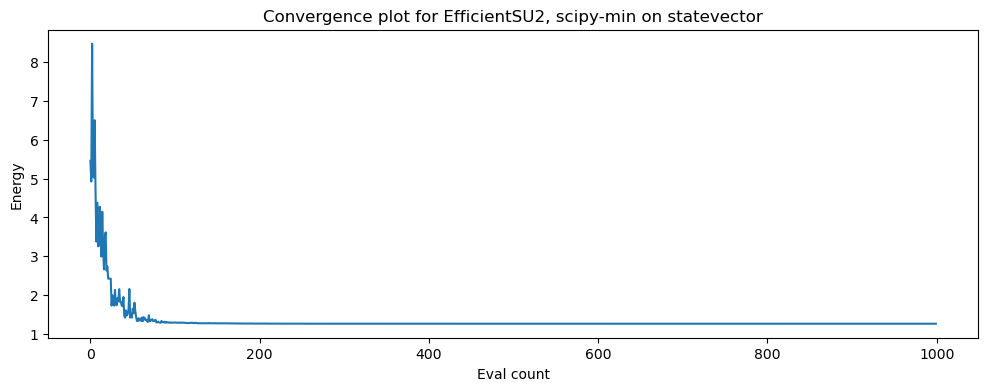

In [79]:
ans_r = seq.ansatz_eval(opt_params)
program.interpret_qiskit_result(ans_r)

seq.vis.visualize()